In [2]:
# Import libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Optionally, to ignore warnings that can clutter your notebook:
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Load data

# 1) Cell composition data
df_cells = pd.read_csv("ThyAge_ctypes_host_percentage.csv")  
# This CSV has columns like ["donor", "aDC1", "aDC1-locnt", ..., "cell_type_N"]

# 2) Donor age data
df_age = pd.read_csv("ThyAge_raw_data_fil.csv")
# This CSV has columns ["donor", "age_months"]

# Check how the data looks
print("Cell composition data:")
display(df_cells.head())

print("Age data:")
display(df_age.head())

Cell composition data:


,donor,aDC1,aDC1-locnt,aDC2,aDC2-locnt,aDC3,aDC3-locnt,B_age-associated,B_dev,B_dev_thy,...,T_Treg(agonist),T_αβT(entry),T_γδT,TEC-cilliated,TEC-EMT,TEC-iono,TEC-myo,TEC-neuro,TEC-tuft,Grand Total
0,A16,0.01%,0.01%,0.01%,0.02%,0.01%,0.01%,0.09%,0.00%,0.01%,...,2.30%,4.19%,0.21%,0.02%,NaN,0.01%,0.00%,0.01%,NaN,100.00%
1,A43,0.01%,0.00%,0.03%,NaN,0.04%,0.00%,0.05%,NaN,0.04%,...,0.70%,0.73%,0.03%,0.18%,0.62%,0.02%,0.34%,0.12%,0.00%,100.00%
2,A45,0.02%,0.01%,0.16%,0.16%,0.15%,0.02%,0.22%,0.01%,22.85%,...,2.56%,8.21%,0.17%,0.29%,0.65%,0.15%,0.79%,0.39%,NaN,100.00%
3,A51,0.01%,NaN,0.01%,0.01%,0.01%,NaN,0.04%,NaN,0.02%,...,0.15%,0.17%,NaN,0.09%,0.27%,0.03%,0.44%,0.10%,NaN,100.00%
4,A53,0.00%,NaN,0.02%,0.02%,0.04%,0.01%,0.11%,NaN,0.19%,...,0.86%,5.72%,0.20%,0.30%,0.59%,0.03%,0.20%,0.14%,0.01%,100.00%


Age data:


,Unnamed: 0,taa_l5,taa_l4,taa_l3,taa_l2,taa_l1,taa_l0,donor,age,age_months
0,T03_TH_TOT_5GEX_2-TGCGGGTCAAAGGTGC,aDC1,aDC1,aDC,aDC,DC,Myeloid,T03,10m,10
1,TA9260112-CTACATTGTTCGTGAT,aDC1,aDC1,aDC,aDC,DC,Myeloid,Z12,8y,96
2,D3_CD45depl-TCGCGAGTCGAGAACG,aDC1,aDC1,aDC,aDC,DC,Myeloid,D3,9m,9
3,D3_CD45depl-ACCTTTAGTTCGTGAT,aDC1,aDC1,aDC,aDC,DC,Myeloid,D3,9m,9
4,D3_CD45depl-CTGATCCTCGTTTGCC,aDC1,aDC1,aDC,aDC,DC,Myeloid,D3,9m,9


In [4]:
# Merge data sets

# Merge using the shared column, 'donor'
df_merged = pd.merge(df_cells, df_age, on="donor")

# Check shape and preview
print("Merged dataset shape:", df_merged.shape)
display(df_merged.head())

Merged dataset shape: (993822, 114)


,donor,aDC1,aDC1-locnt,aDC2,aDC2-locnt,aDC3,aDC3-locnt,B_age-associated,B_dev,B_dev_thy,...,Grand Total,Unnamed: 0,taa_l5,taa_l4,taa_l3,taa_l2,taa_l1,taa_l0,age,age_months
0,A16,0.01%,0.01%,0.01%,0.02%,0.01%,0.01%,0.09%,0.00%,0.01%,...,100.00%,A16_TH_TOT_7-CTGAAGTCAGCGAACA,aDC1,aDC1,aDC,aDC,DC,Myeloid,24y,288
1,A16,0.01%,0.01%,0.01%,0.02%,0.01%,0.01%,0.09%,0.00%,0.01%,...,100.00%,A16_TH_TOT_8-AACTGGTTCTTGTCAT,aDC1,aDC1,aDC,aDC,DC,Myeloid,24y,288
2,A16,0.01%,0.01%,0.01%,0.02%,0.01%,0.01%,0.09%,0.00%,0.01%,...,100.00%,A16_TH_TOT_5GEX_2-GTTACAGAGTGTCTCA,aDC1-locnt,aDC1,aDC,aDC,DC,Myeloid,24y,288
3,A16,0.01%,0.01%,0.01%,0.02%,0.01%,0.01%,0.09%,0.00%,0.01%,...,100.00%,A16_TH_TOT_3-AGTAGTCAGTCTCGGC,aDC1-locnt,aDC1,aDC,aDC,DC,Myeloid,24y,288
4,A16,0.01%,0.01%,0.01%,0.02%,0.01%,0.01%,0.09%,0.00%,0.01%,...,100.00%,A16_TH_TOT_4-GTAGTCAGTCTGATCA,aDC1-locnt,aDC1,aDC,aDC,DC,Myeloid,24y,288


In [5]:
# Convert missing data to zero (brutal)

print("Missing values before filling:")
print(df_merged.isna().sum())

# Fill missing values with 0
df_merged = df_merged.fillna("0.00%")

print("\nMissing values after filling:")
print(df_merged.isna().sum())

Missing values before filling:
donor              0
aDC1          366253
aDC1-locnt    457621
aDC2          274891
aDC2-locnt    433664
               ...  
taa_l2             0
taa_l1             0
taa_l0             0
age                0
age_months         0
Length: 114, dtype: int64

Missing values after filling:
donor         0
aDC1          0
aDC1-locnt    0
aDC2          0
aDC2-locnt    0
             ..
taa_l2        0
taa_l1        0
taa_l0        0
age           0
age_months    0
Length: 114, dtype: int64


In [6]:
# Convert percentage string to floats

percentage_cols = [col for col in df_merged.columns 
                   if col not in ["donor", "age", "Grand Total", "Unnamed: 0", 
                    "taa_l5", "taa_l4", "taa_l3", "taa_l2", "taa_l1", "taa_l0"]]

def percent_to_float(s):
    """
    Convert a string like '0.01%' to a float 0.0001.
    If already float or numeric, just return it as float.
    If s is NaN or empty, return NaN or 0 as needed.
    """
    if isinstance(s, str) and s.endswith('%'):
        # Remove '%'
        s_no_percent = s[:-1]
        # Convert to float
        value = float(s_no_percent)
        # Turn from percentage (e.g. 0.01) to fraction of 1 (0.0001)
        return value / 100
    else:
        # If it's already numeric or something else, try to convert
        return float(s)

# Apply percent_to_float to each column in percentage_cols
for col in percentage_cols:
    df_merged[col] = df_merged[col].apply(percent_to_float)

# Verify by inspecting a few rows
print(df_merged[percentage_cols].head())

     aDC1  aDC1-locnt    aDC2  aDC2-locnt    aDC3  aDC3-locnt  \
0  0.0001      0.0001  0.0001      0.0002  0.0001      0.0001   
1  0.0001      0.0001  0.0001      0.0002  0.0001      0.0001   
2  0.0001      0.0001  0.0001      0.0002  0.0001      0.0001   
3  0.0001      0.0001  0.0001      0.0002  0.0001      0.0001   
4  0.0001      0.0001  0.0001      0.0002  0.0001      0.0001   

   B_age-associated  B_dev  B_dev_thy  B_GC-like  ...  T_Treg(agonist)  \
0            0.0009    0.0     0.0001     0.0003  ...            0.023   
1            0.0009    0.0     0.0001     0.0003  ...            0.023   
2            0.0009    0.0     0.0001     0.0003  ...            0.023   
3            0.0009    0.0     0.0001     0.0003  ...            0.023   
4            0.0009    0.0     0.0001     0.0003  ...            0.023   

   T_αβT(entry)   T_γδT  TEC-cilliated  TEC-EMT  TEC-iono  TEC-myo  TEC-neuro  \
0        0.0419  0.0021         0.0002      0.0    0.0001      0.0     0.0001   
1 

In [7]:
# Define features (X) and target (y)

donors = df_merged["donor"]          # Keep track of donor IDs

# Drop donor ID and the Age column from the feature set
X = df_merged.drop(["donor", "age_months", "Grand Total", "Unnamed: 0", 
                    "taa_l5", "taa_l4", "taa_l3", "taa_l2", "taa_l1", "taa_l0", "age"], axis=1)
y = df_merged["age_months"]

# Optional: check for missing values
print("Number of missing values per column:")
print(df_merged.isnull().sum())

Number of missing values per column:
donor         0
aDC1          0
aDC1-locnt    0
aDC2          0
aDC2-locnt    0
             ..
taa_l2        0
taa_l1        0
taa_l0        0
age           0
age_months    0
Length: 114, dtype: int64


In [8]:
# Log transform percentages

import numpy as np

# If X is a pandas DataFrame of your features:
X_log = np.log1p(X)  # This applies log(1 + x) elementwise

In [18]:
# Split data into training and test sets

X_train, X_test, y_train, y_test, donor_train, donor_test = train_test_split(
    X, y, donors, 
    test_size=0.2,        # 20% of data for testing
    random_state=42       # Ensures reproducible results
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (795057, 103)
Test set size: (198765, 103)


In [19]:
# Train the model

# Create a simple Random Forest regressor
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

# Fit on the training data
rf_regressor.fit(X_train_log, y_train)

print("Random Forest training complete.")

Random Forest training complete.


In [22]:
X_train_log

,aDC1,aDC1-locnt,aDC2,aDC2-locnt,aDC3,aDC3-locnt,B_age-associated,B_dev,B_dev_thy,B_GC-like,...,T_Treg_tr,T_Treg(agonist),T_αβT(entry),T_γδT,TEC-cilliated,TEC-EMT,TEC-iono,TEC-myo,TEC-neuro,TEC-tuft
152134,0.0000,0.0001,0.000400,0.0002,0.000200,0.000000,0.004291,0.0,0.001599,0.005187,...,0.003195,0.000500,0.001099,0.000000,0.001000,0.000500,0.000200,0.000700,0.000600,0.000200
8364,0.0001,0.0001,0.000100,0.0002,0.000100,0.000100,0.000900,0.0,0.000100,0.000300,...,0.010148,0.022739,0.041046,0.002098,0.000200,0.000000,0.000100,0.000000,0.000100,0.000000
439854,0.0000,0.0000,0.000000,0.0000,0.000000,0.000000,0.001798,0.0,0.000200,0.000400,...,0.002098,0.011533,0.135317,0.004291,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6386,0.0001,0.0001,0.000100,0.0002,0.000100,0.000100,0.000900,0.0,0.000100,0.000300,...,0.010148,0.022739,0.041046,0.002098,0.000200,0.000000,0.000100,0.000000,0.000100,0.000000
131612,0.0000,0.0000,0.000000,0.0001,0.000000,0.000100,0.000100,0.0,0.000300,0.000500,...,0.001998,0.002597,0.003693,0.000100,0.001599,0.172860,0.000500,0.031402,0.008266,0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0.0000,0.0000,0.000000,0.0001,0.000100,0.000000,0.000000,0.0,0.000200,0.000000,...,0.000200,0.005684,0.010049,0.000200,0.002397,0.004490,0.004589,0.006181,0.003793,0.000900
365838,0.0004,0.0001,0.005087,0.0004,0.015578,0.001099,0.000400,0.0,0.000100,0.001399,...,0.003394,0.027518,0.064007,0.003693,0.015283,0.001699,0.011731,0.007869,0.031014,0.003295
131932,0.0000,0.0000,0.000000,0.0001,0.000000,0.000100,0.000100,0.0,0.000300,0.000500,...,0.001998,0.002597,0.003693,0.000100,0.001599,0.172860,0.000500,0.031402,0.008266,0.000200
671155,0.0000,0.0000,0.000000,0.0000,0.000000,0.000100,0.002198,0.0,0.000600,0.000200,...,0.000700,0.031111,0.086636,0.009158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
# Evaluate the model

y_pred = rf_regressor.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluation on Test Set:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Evaluation on Test Set:
Mean Absolute Error (MAE): 1.440124066108219
Mean Squared Error (MSE): 21.588611249465448
R-squared (R²): 0.9994841155467966


In [28]:
# Compare predictions to true values

results_df = pd.DataFrame({
    "donor_id": donor_test,
    "true_age": y_test,
    "pred_age": y_pred
})
results_df["abs_error"] = np.abs(results_df["true_age"] - results_df["pred_age"])

# Sort by error in descending order
results_df.sort_values(by="abs_error", ascending=False, inplace=True)

print(results_df)

       donor_id  true_age  pred_age  abs_error
612588     Thy7       5.0     32.16      27.16
614490     Thy7       5.0     32.16      27.16
616078     Thy7       5.0     32.16      27.16
616850     Thy7       5.0     32.16      27.16
617963     Thy7       5.0     32.16      27.16
...         ...       ...       ...        ...
275102       D1       0.0      0.00       0.00
100590      A53     348.0    348.00       0.00
17108       A16     288.0    288.00       0.00
733801  TSC-CT8       2.0      2.00       0.00
816799     TSP2     732.0    732.00       0.00

[198765 rows x 4 columns]


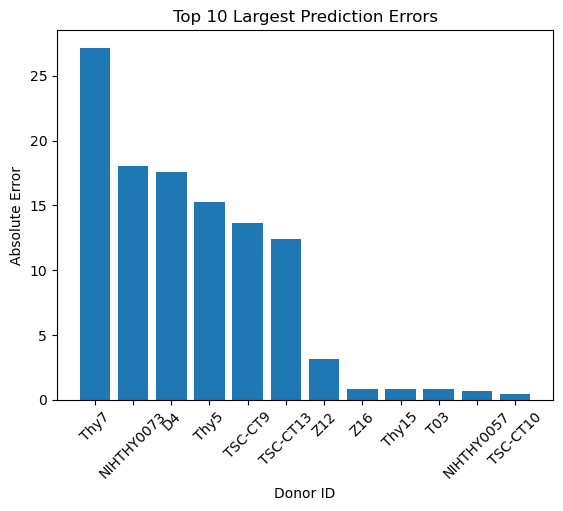

In [36]:
# Visualise: bar chart of the absolute errors for the worst predictions

worst_10 = results_df.head(30000)
plt.figure()
plt.bar(x=worst_10["donor_id"], height=worst_10["abs_error"])
plt.xlabel("Donor ID")
plt.ylabel("Absolute Error")
plt.title("Top 10 Largest Prediction Errors")
plt.xticks(rotation=45)
plt.show()

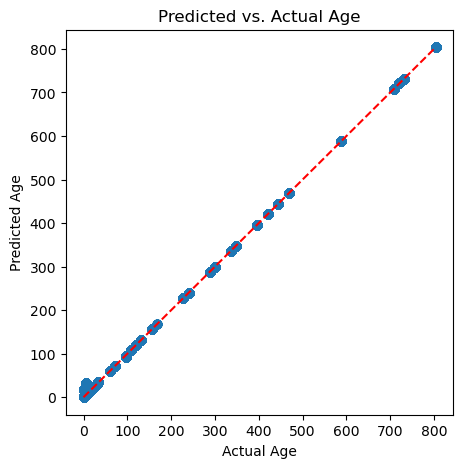

In [34]:
# Visualise: Scatter Plot of Predicted vs. Actual

import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs. Actual Age")
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")

# Optionally, plot a diagonal line for perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.show()

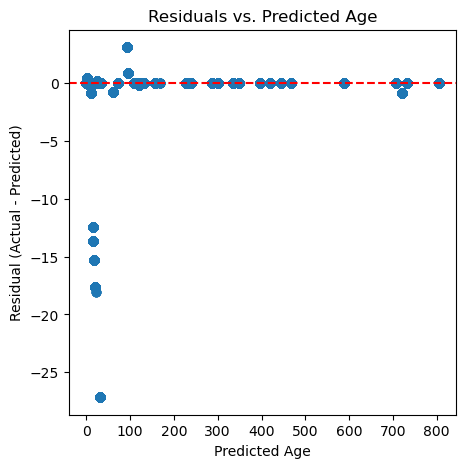

In [35]:
# Visualise: Residual Plot

residuals = y_test - y_pred
plt.figure(figsize=(5, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.title("Residuals vs. Predicted Age")
plt.xlabel("Predicted Age")
plt.ylabel("Residual (Actual - Predicted)")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [37]:
# Feature predictions - what cell type predicts best?

importances = rf_regressor.feature_importances_

feature_names = X.columns  # A list or index of your cell-type columns
feature_importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

# Sort by importance descending
feature_importance_df.sort_values(by="importance", ascending=False, inplace=True)

# Check the top 10
print(feature_importance_df.head(10))

               feature  importance
13               B_mem    0.753962
90              T_MAIT    0.081762
41           Fb-interm    0.078384
71  T_CD4_naive_recirc    0.027883
70         T_CD4_naive    0.020249
77            T_CD8_rm    0.014030
28           DC2_SFTPD    0.003483
67           T_CD4_act    0.003278
48            Mac_SPIC    0.002771
76  T_CD8_naive_recirc    0.000583


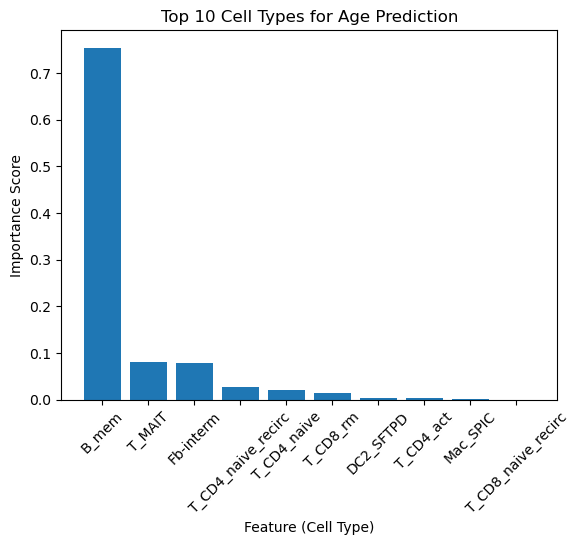

In [38]:
# Visualise: importance - bar chart of the top features

import matplotlib.pyplot as plt

top_n = 10  # How many top features to show
top_features = feature_importance_df.head(top_n)

plt.figure()
plt.bar(top_features["feature"], top_features["importance"])
plt.xlabel("Feature (Cell Type)")
plt.ylabel("Importance Score")
plt.title("Top 10 Cell Types for Age Prediction")
plt.xticks(rotation=45)
plt.show()